In [2]:
# Naive implementation drawn from http://mathematica.stackexchange.com/questions/4829/efficiently-generating-n-d-gaussian-random-fields
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def fftIndgen(n):
    a = range(0, n/2+1)
    b = range(1, n/2)
    b.reverse()
    b = [-i for i in b]
    return a + b

def gaussian_random_field(Pk = lambda k : k**-3.0, size = 100):
    def Pk2(kx, ky):
        if kx == 0 and ky == 0:
            return 0.0
        return np.sqrt(Pk(np.sqrt(kx**2 + ky**2)))
    noise = np.fft.fft2(np.random.normal(size = (size, size)))
    amplitude = np.zeros((size,size))
    for i, kx in enumerate(fftIndgen(size)):
        for j, ky in enumerate(fftIndgen(size)):            
            amplitude[i, j] = Pk2(kx, ky)
    return np.fft.ifft2(noise * amplitude)


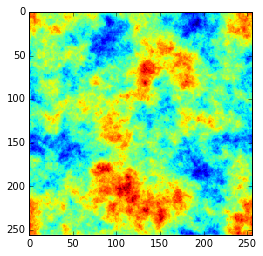

In [4]:
out = gaussian_random_field(Pk = lambda k: k**-3.0, size=256)
plt.imshow(out.real, interpolation='none')

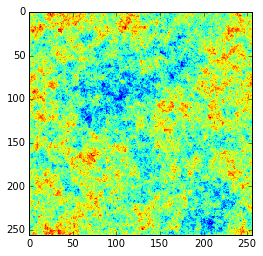

In [7]:
out = gaussian_random_field(Pk = lambda k: k**-2.0, size=256)
plt.imshow(out.real, interpolation='none')

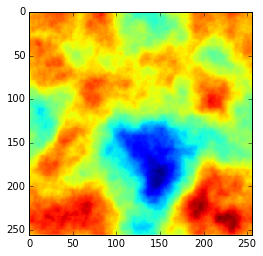

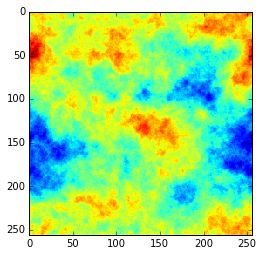

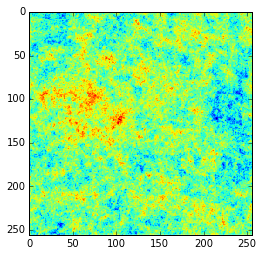

In [12]:
for alpha in [-4.0, -3.0, -2.0]:
    out = gaussian_random_field(Pk = lambda k: k**alpha, size=256)
    plt.figure()
    plt.imshow(out.real, interpolation='none')